# Features engineering

#### What have we done so far?

During EDA part, we have explored and understood the dataset we are working on. We have prepared some ideas on variables modification and have examined them. We have found some dependencies and correlations between variables. 

The most significant changes in dataset are:
* splittiing dataset into one for traing and testing and the one for validation task
* converting day and month columns into one named day_of_the_year
Other changes have not been saved yet.

## Categorical features

In [434]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [435]:
bank_data_df = pd.read_csv('datasource/bank_data_df_changed_time.csv')

In [436]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3616 non-null   int64 
 1   age              3616 non-null   int64 
 2   job              3616 non-null   object
 3   marital          3616 non-null   object
 4   education        3616 non-null   object
 5   default          3616 non-null   object
 6   balance          3616 non-null   int64 
 7   housing          3616 non-null   object
 8   loan             3616 non-null   object
 9   contact          3616 non-null   object
 10  duration         3616 non-null   int64 
 11  campaign         3616 non-null   int64 
 12  pdays            3616 non-null   int64 
 13  previous         3616 non-null   int64 
 14  poutcome         3616 non-null   object
 15  y                3616 non-null   int64 
 16  day_of_the_year  3616 non-null   int64 
dtypes: int64(9), object(8)
memory usa

In [437]:
bank_data_df = bank_data_df.iloc[:,1:]

In [438]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3616 non-null   int64 
 1   job              3616 non-null   object
 2   marital          3616 non-null   object
 3   education        3616 non-null   object
 4   default          3616 non-null   object
 5   balance          3616 non-null   int64 
 6   housing          3616 non-null   object
 7   loan             3616 non-null   object
 8   contact          3616 non-null   object
 9   duration         3616 non-null   int64 
 10  campaign         3616 non-null   int64 
 11  pdays            3616 non-null   int64 
 12  previous         3616 non-null   int64 
 13  poutcome         3616 non-null   object
 14  y                3616 non-null   int64 
 15  day_of_the_year  3616 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 452.1+ KB


In [439]:
target_value = "y"

In [440]:
cols = bank_data_df.columns.to_list()
cols[-1], cols[-2] = cols[-2], cols[-1] 
bank_data_df = bank_data_df[cols]

In [441]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3616 non-null   int64 
 1   job              3616 non-null   object
 2   marital          3616 non-null   object
 3   education        3616 non-null   object
 4   default          3616 non-null   object
 5   balance          3616 non-null   int64 
 6   housing          3616 non-null   object
 7   loan             3616 non-null   object
 8   contact          3616 non-null   object
 9   duration         3616 non-null   int64 
 10  campaign         3616 non-null   int64 
 11  pdays            3616 non-null   int64 
 12  previous         3616 non-null   int64 
 13  poutcome         3616 non-null   object
 14  day_of_the_year  3616 non-null   int64 
 15  y                3616 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 452.1+ KB


### Education

In [442]:
bank_data_df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

Maybe a good transormation for this feature will be following dictionary:

In [443]:
ed_dict = {'unknown' : 0, 'secondary' : 0.5, 'tertiary' : 1, 'primary' : 0.25}

In [444]:
bank_data_df = bank_data_df.replace({"education": ed_dict})

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_9216/3812209549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"education": ed_dict})


In [445]:
bank_data_df.education.isna().sum()

0

### Martial

In [446]:
bank_data_df.marital.unique()

array(['divorced', 'single', 'married'], dtype=object)

In [447]:
m_dict = {"single" : 0, "divorced" : 0.5, "married"  : 1}
bank_data_df = bank_data_df.replace({"marital": m_dict}) #there is misspelling in name of this variable

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_9216/420417880.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"marital": m_dict}) #there is misspelling in name of this variable


### YesNo 

In [448]:
yn_dict = {"no" :0, "yes" :1}

In [449]:
bank_data_df = bank_data_df.replace({"default": yn_dict, "housing" : yn_dict, "loan" : yn_dict})

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_9216/3788033126.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"default": yn_dict, "housing" : yn_dict, "loan" : yn_dict})


In [450]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3616 non-null   int64  
 1   job              3616 non-null   object 
 2   marital          3616 non-null   float64
 3   education        3616 non-null   float64
 4   default          3616 non-null   int64  
 5   balance          3616 non-null   int64  
 6   housing          3616 non-null   int64  
 7   loan             3616 non-null   int64  
 8   contact          3616 non-null   object 
 9   duration         3616 non-null   int64  
 10  campaign         3616 non-null   int64  
 11  pdays            3616 non-null   int64  
 12  previous         3616 non-null   int64  
 13  poutcome         3616 non-null   object 
 14  day_of_the_year  3616 non-null   int64  
 15  y                3616 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 452.1+ KB


### Job

In [451]:
from sklearn.preprocessing import OneHotEncoder

In [452]:
oe = OneHotEncoder(sparse_output=False)
job_transformed = oe.fit_transform(bank_data_df.loc[:, bank_data_df.columns == "job"])

In [453]:
oe.get_feature_names_out()

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown'], dtype=object)

In [454]:
job_transformed.shape

(3616, 12)

In [455]:
tmp = pd.DataFrame(data=job_transformed ,columns= oe.get_feature_names_out().tolist(), dtype= "int64")
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   job_admin.         3616 non-null   int64
 1   job_blue-collar    3616 non-null   int64
 2   job_entrepreneur   3616 non-null   int64
 3   job_housemaid      3616 non-null   int64
 4   job_management     3616 non-null   int64
 5   job_retired        3616 non-null   int64
 6   job_self-employed  3616 non-null   int64
 7   job_services       3616 non-null   int64
 8   job_student        3616 non-null   int64
 9   job_technician     3616 non-null   int64
 10  job_unemployed     3616 non-null   int64
 11  job_unknown        3616 non-null   int64
dtypes: int64(12)
memory usage: 339.1 KB


In [456]:
tmp.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [457]:
for name in oe.get_feature_names_out().tolist():
    bank_data_df[name] = tmp[name]

In [458]:
bank_data_df[["job", "job_admin."]].head()

,job,job_admin.
0,admin.,1
1,technician,0
2,management,0
3,blue-collar,0
4,blue-collar,0


In [459]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   object 
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

### Contact

In [460]:
bank_data_df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [461]:
oe = OneHotEncoder(sparse_output=False)
job_transformed = oe.fit_transform(bank_data_df.loc[:, bank_data_df.columns == "contact"])

In [462]:
tmp = pd.DataFrame(data=job_transformed ,columns= oe.get_feature_names_out().tolist(), dtype= "int64")
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   contact_cellular   3616 non-null   int64
 1   contact_telephone  3616 non-null   int64
 2   contact_unknown    3616 non-null   int64
dtypes: int64(3)
memory usage: 84.9 KB


In [463]:
for name in oe.get_feature_names_out().tolist():
    bank_data_df[name] = tmp[name]

In [464]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   object 
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

### Poutcome

In [465]:
bank_data_df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [466]:
poutcome_dict = {"failure":0, "other": 0.25, "unknown": 0.5, "success": 1}

In [467]:
bank_data_df= bank_data_df.replace({"poutcome": poutcome_dict})

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_9216/3786885995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df= bank_data_df.replace({"poutcome": poutcome_dict})


In [468]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   float64
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

In [469]:
bank_data_df.drop(columns=["job", "contact"], inplace= True)

In [470]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   marital            3616 non-null   float64
 2   education          3616 non-null   float64
 3   default            3616 non-null   int64  
 4   balance            3616 non-null   int64  
 5   housing            3616 non-null   int64  
 6   loan               3616 non-null   int64  
 7   duration           3616 non-null   int64  
 8   campaign           3616 non-null   int64  
 9   pdays              3616 non-null   int64  
 10  previous           3616 non-null   int64  
 11  poutcome           3616 non-null   float64
 12  day_of_the_year    3616 non-null   int64  
 13  y                  3616 non-null   int64  
 14  job_admin.         3616 non-null   int64  
 15  job_blue-collar    3616 non-null   int64  
 16  job_entrepreneur   3616 

### Importances check

In [471]:
from sklearn.ensemble import RandomForestClassifier

feature_names = bank_data_df.loc[:, bank_data_df.columns != target_value].columns.values
forest = RandomForestClassifier(random_state=0)
forest.fit(bank_data_df.drop(columns="y"), bank_data_df[target_value])

RandomForestClassifier(random_state=0)

In [472]:
feature_names

array(['age', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'day_of_the_year', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype=object)

In [473]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.006 seconds


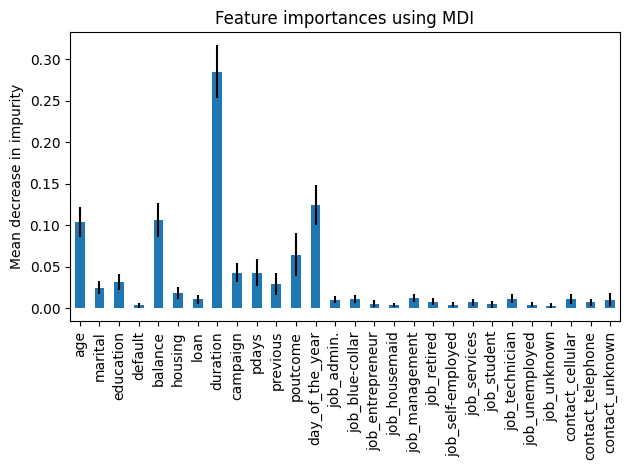

In [474]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [475]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, bank_data_df.drop(columns="y"), bank_data_df[target_value], n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 6.563 seconds


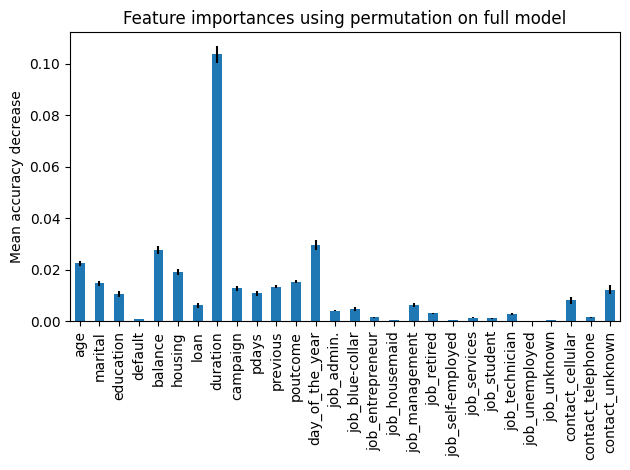

In [476]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [477]:
bank_data_df.describe()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,41.043971,0.674226,0.590017,0.019082,1403.934458,0.568308,0.154591,263.769358,2.795354,40.218473,...,0.046737,0.040376,0.088772,0.017976,0.175608,0.028208,0.007743,0.646018,0.063606,0.290376
std,10.464800,0.435854,0.293404,0.136832,2811.286428,0.495381,0.361564,260.675975,3.144846,100.170192,...,0.211104,0.196867,0.284454,0.132881,0.380539,0.165589,0.087667,0.478270,0.244084,0.453999
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,4.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.500000,0.000000,65.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.500000,0.000000,450.500000,1.000000,0.000000,185.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,1477.750000,1.000000,0.000000,330.000000,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,42045.000000,1.000000,1.000000,3025.000000,50.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [478]:
bank_data_df.y.describe()

count    3616.000000
mean        0.115321
std         0.319453
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

## Numerical features

In [479]:
numerical_features =['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [480]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, Normalizer, StandardScaler, MinMaxScaler, power_transform
import scipy.stats as stats

# def Gaussian_distribution_check(data):
    
#     fig = plt.figure(figsize=(15,5), dpi=300)    
    
#     ax1 = fig.add_subplot(1,2,1)
#     sns.histplot(data, kde=True, ax=ax1)
    
#     ax2 = fig.add_subplot(1,2,2)  
#     stats.probplot(data, dist="norm", plot=ax2)

#     plt.show()

In [481]:
def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

### duration

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


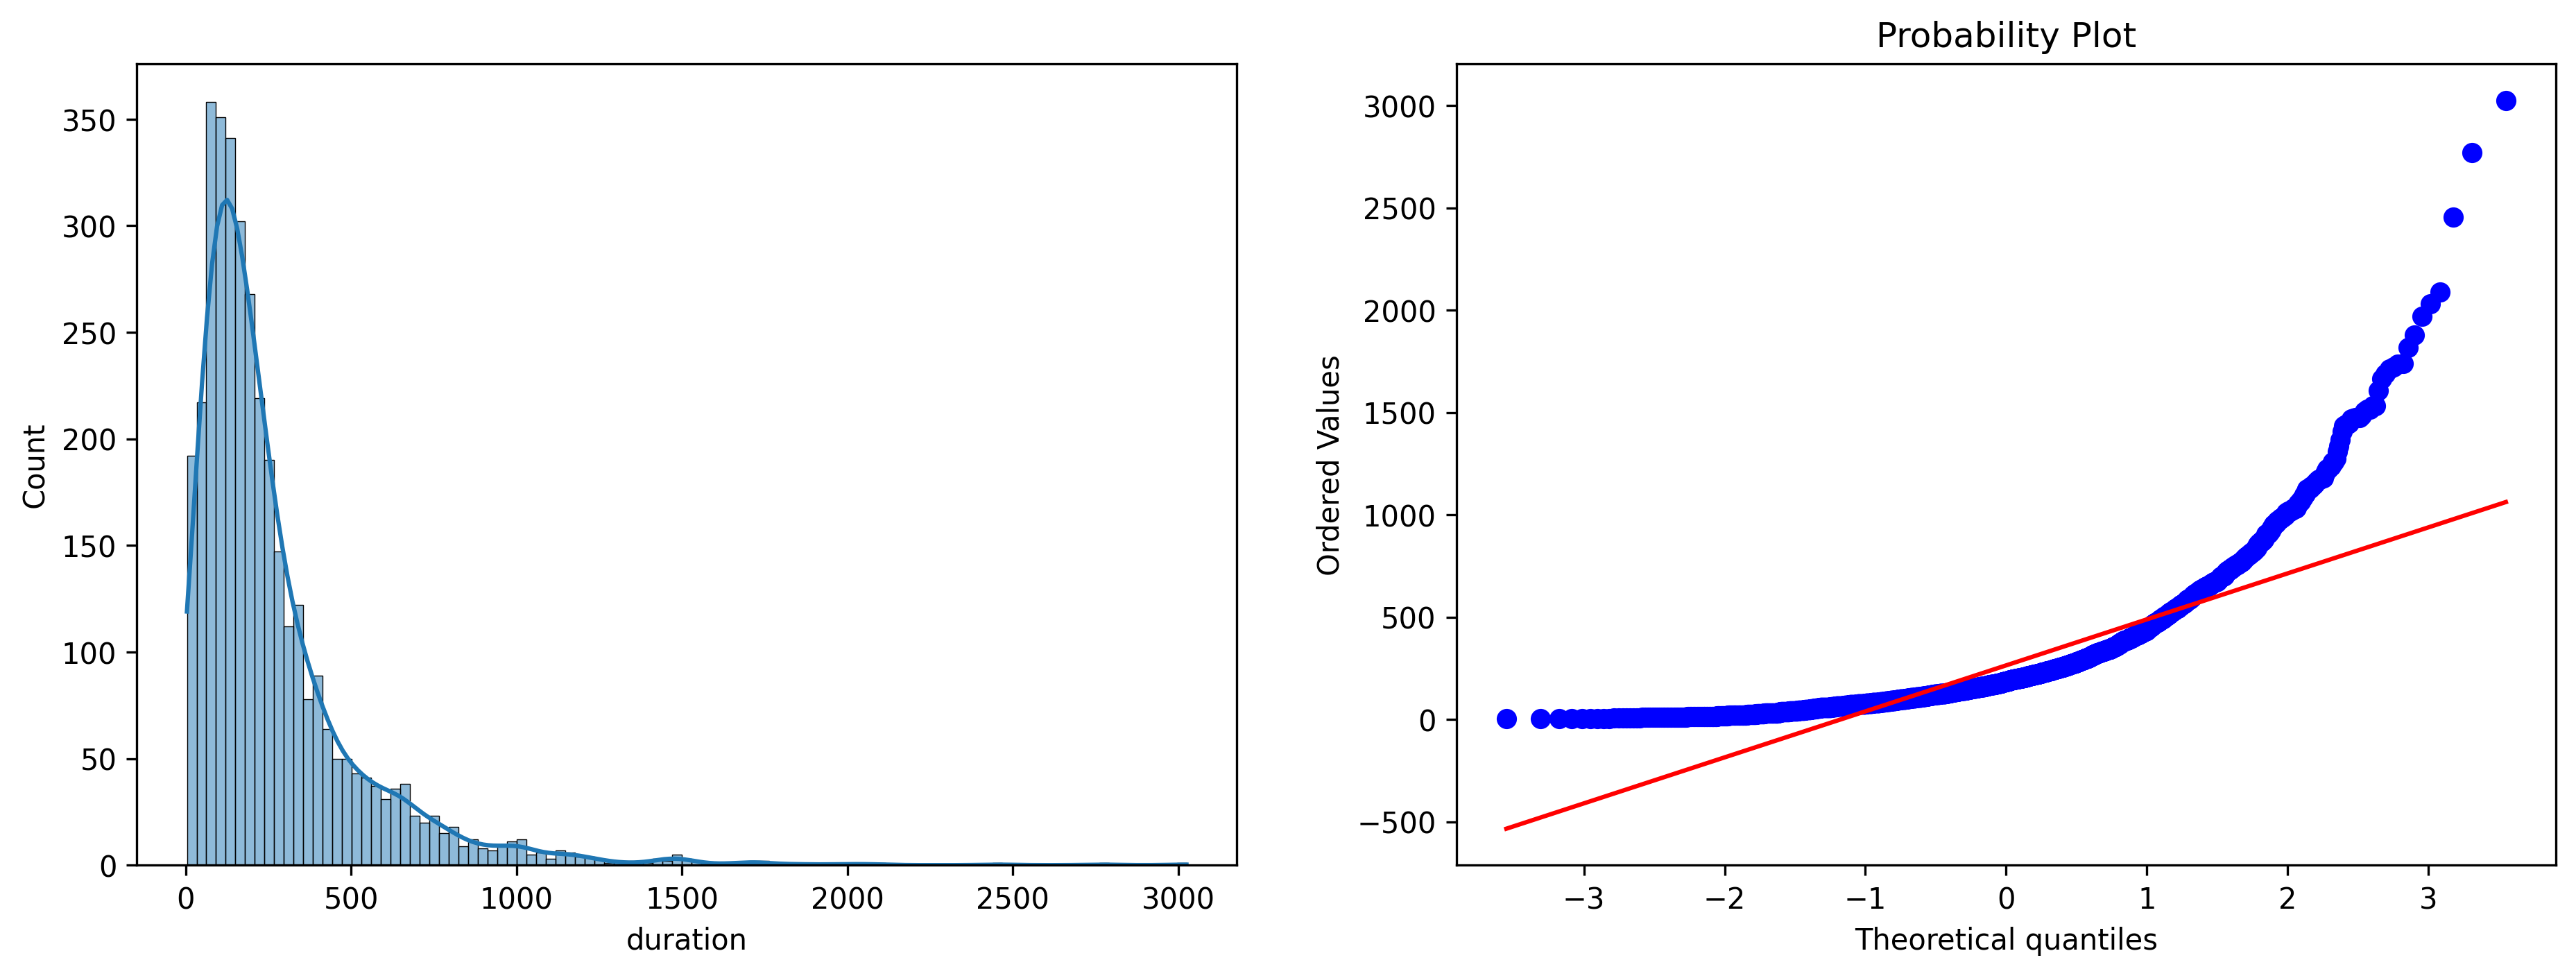

In [482]:
Gaussian_distribution_check(bank_data_df, 'duration')

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


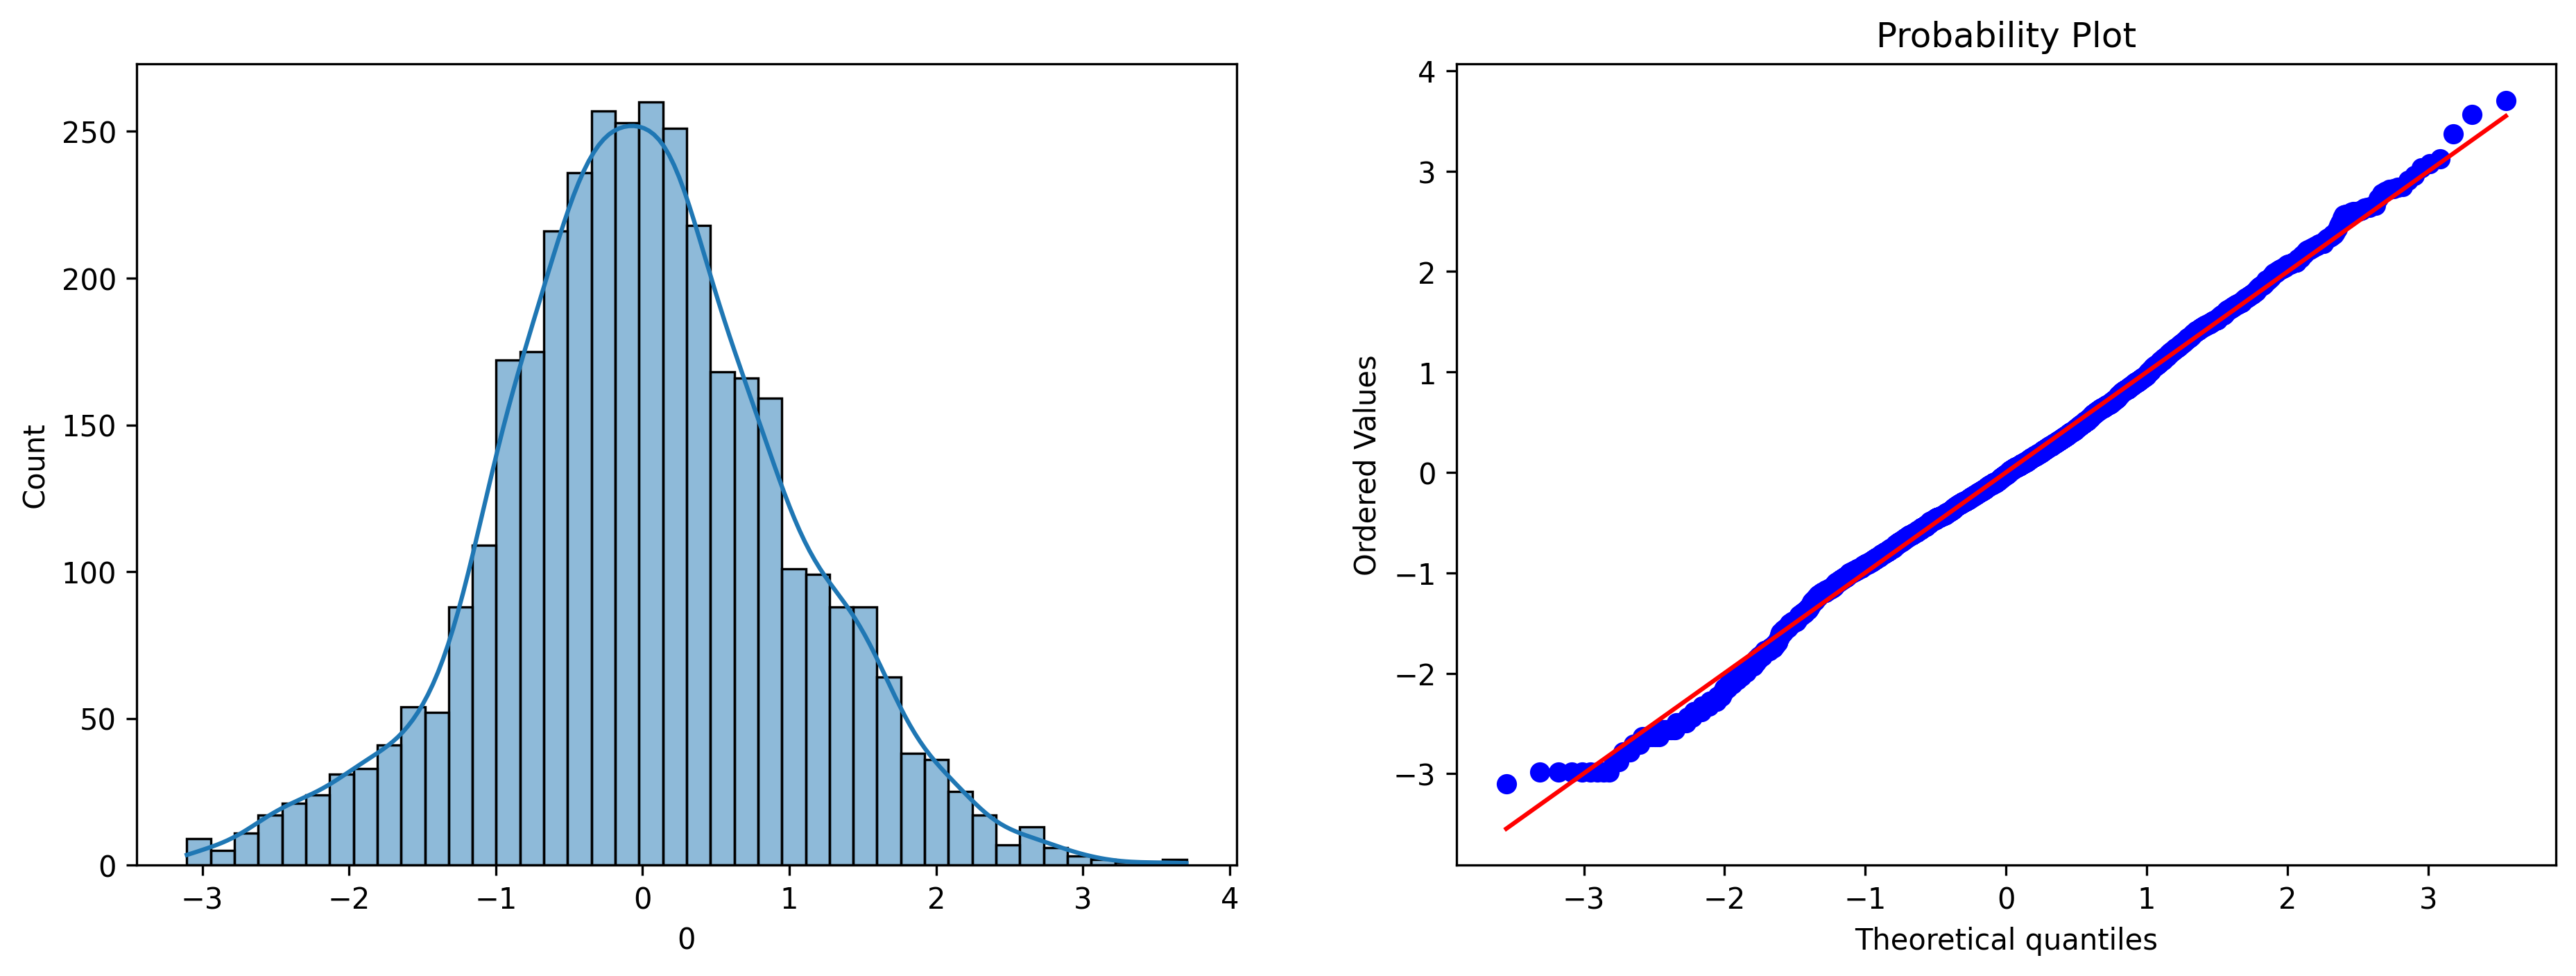

In [483]:
# good transformatino but gives us negative values in duration column
df_trans = pd.DataFrame(power_transform(bank_data_df[['duration']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


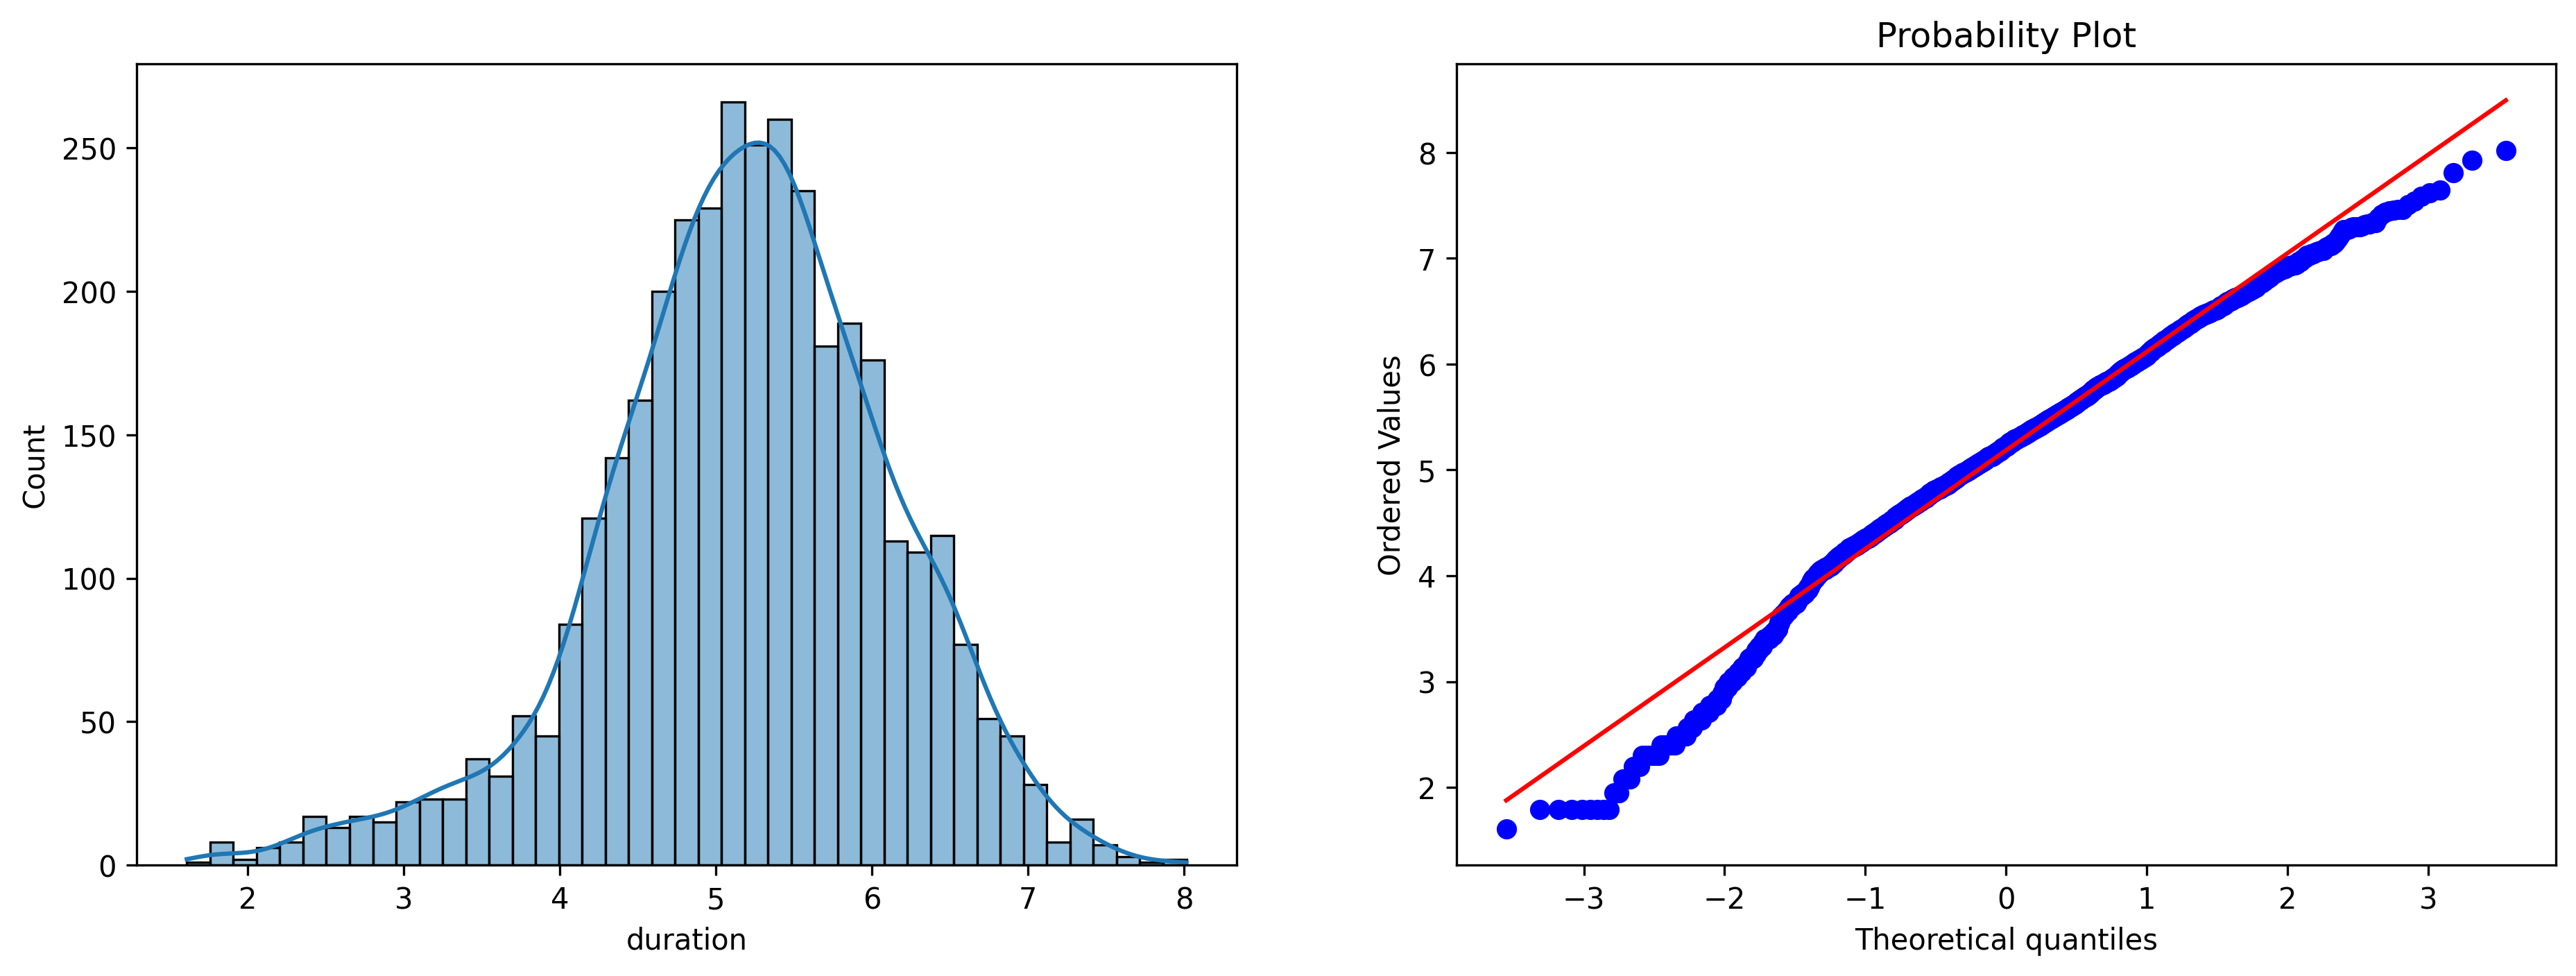

In [484]:
# another decent transformatino but it would be better to have values in 0-1 range ??
df_trans = pd.DataFrame(np.log1p(bank_data_df['duration']))
Gaussian_distribution_check(df_trans, "duration")

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


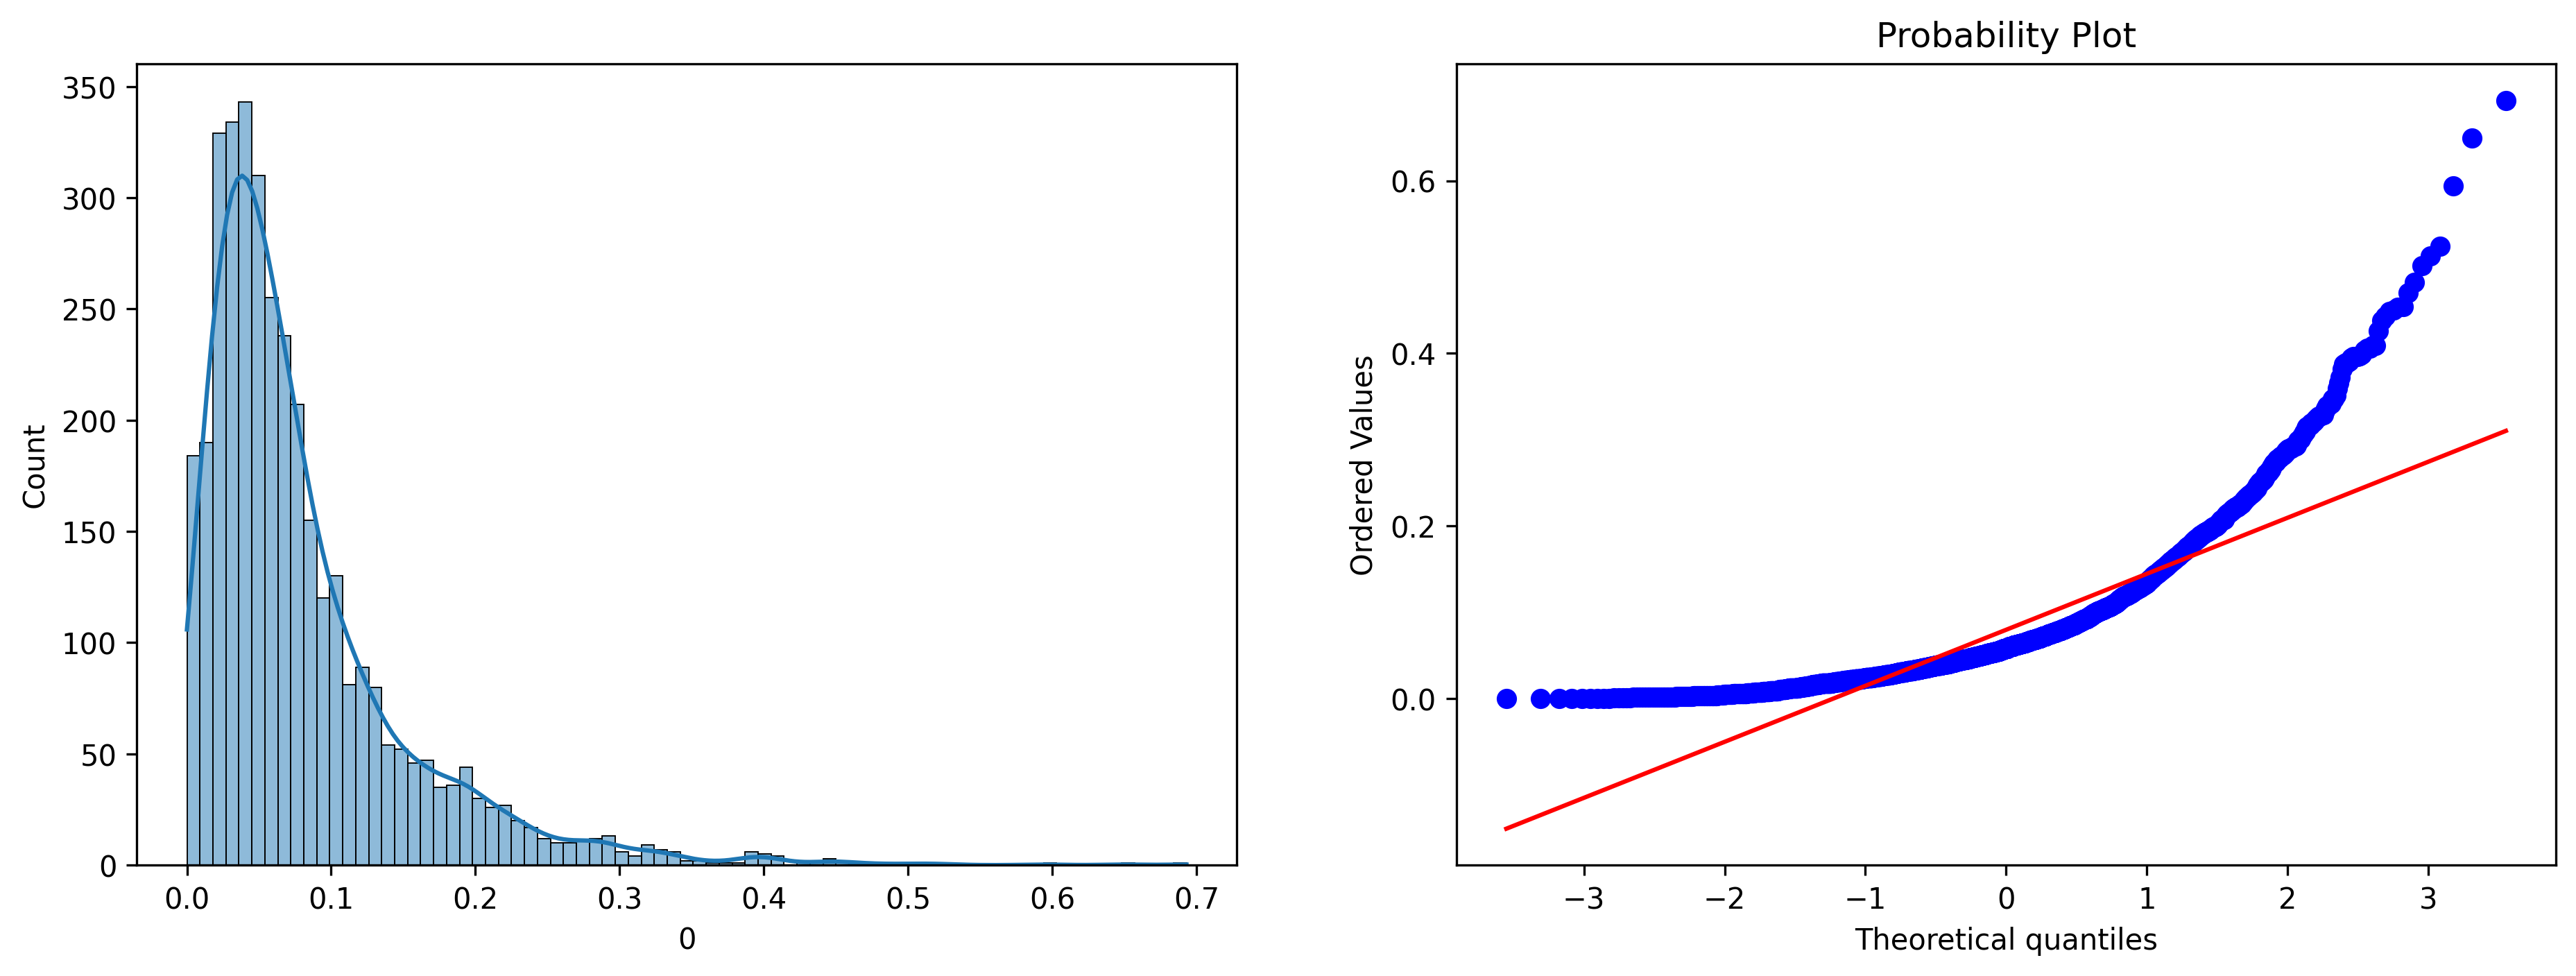

In [485]:
# combining MinMaxStand with log transformation works trashy
duration_scaler = MinMaxScaler().fit(bank_data_df[["duration"]])
duration_scaled = duration_scaler.transform(bank_data_df[["duration"]])

df_trans = pd.DataFrame(np.log1p(duration_scaled.flatten()))
Gaussian_distribution_check(df_trans, 0)

In [486]:
bank_data_df['duration'] = power_transform(bank_data_df[['duration']], method='yeo-johnson')

We have to check which one log1p or yeo-johnson gives better results

### age

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


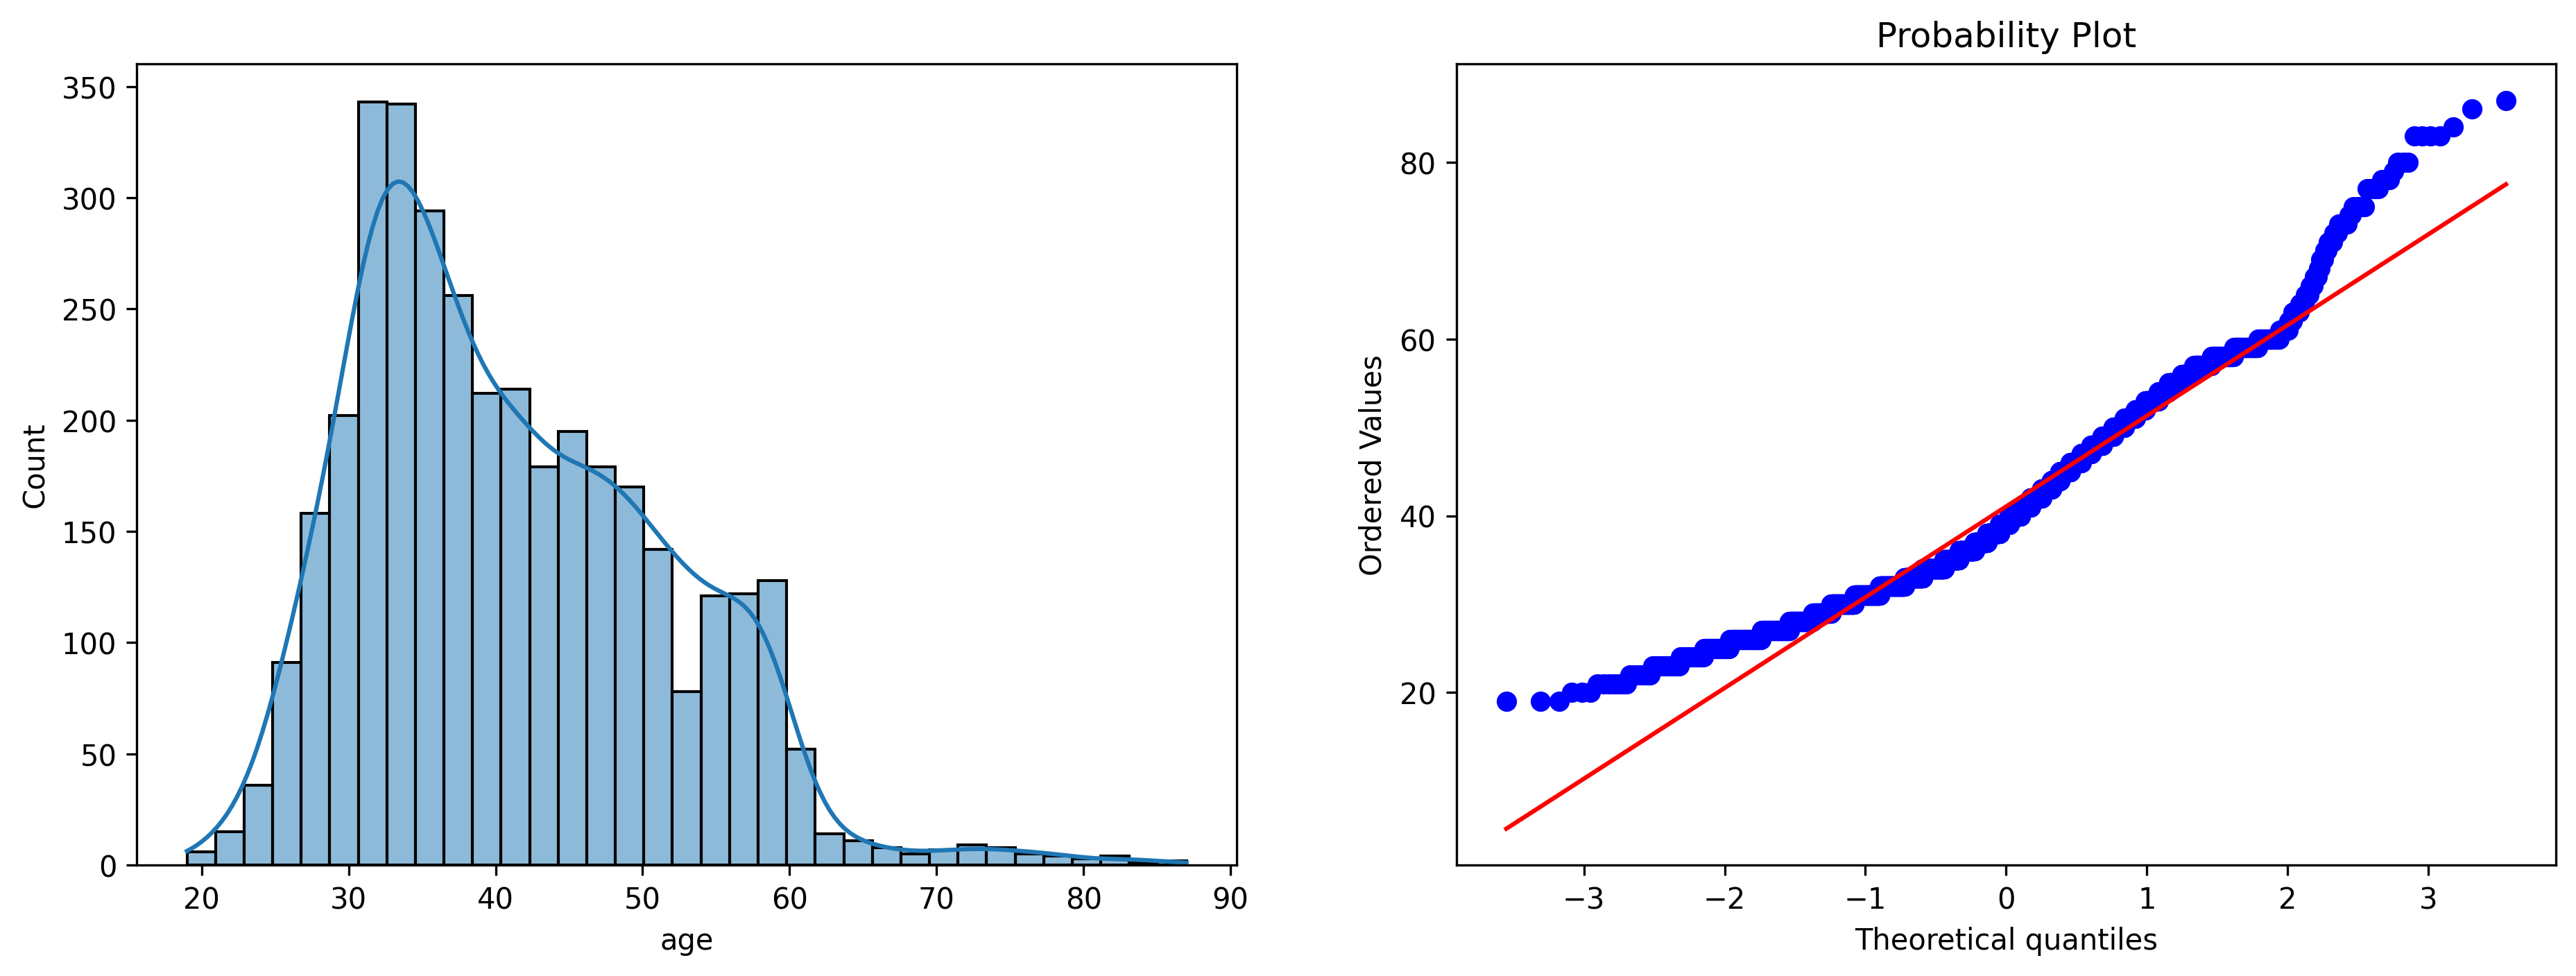

In [487]:
Gaussian_distribution_check(bank_data_df, 'age')

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


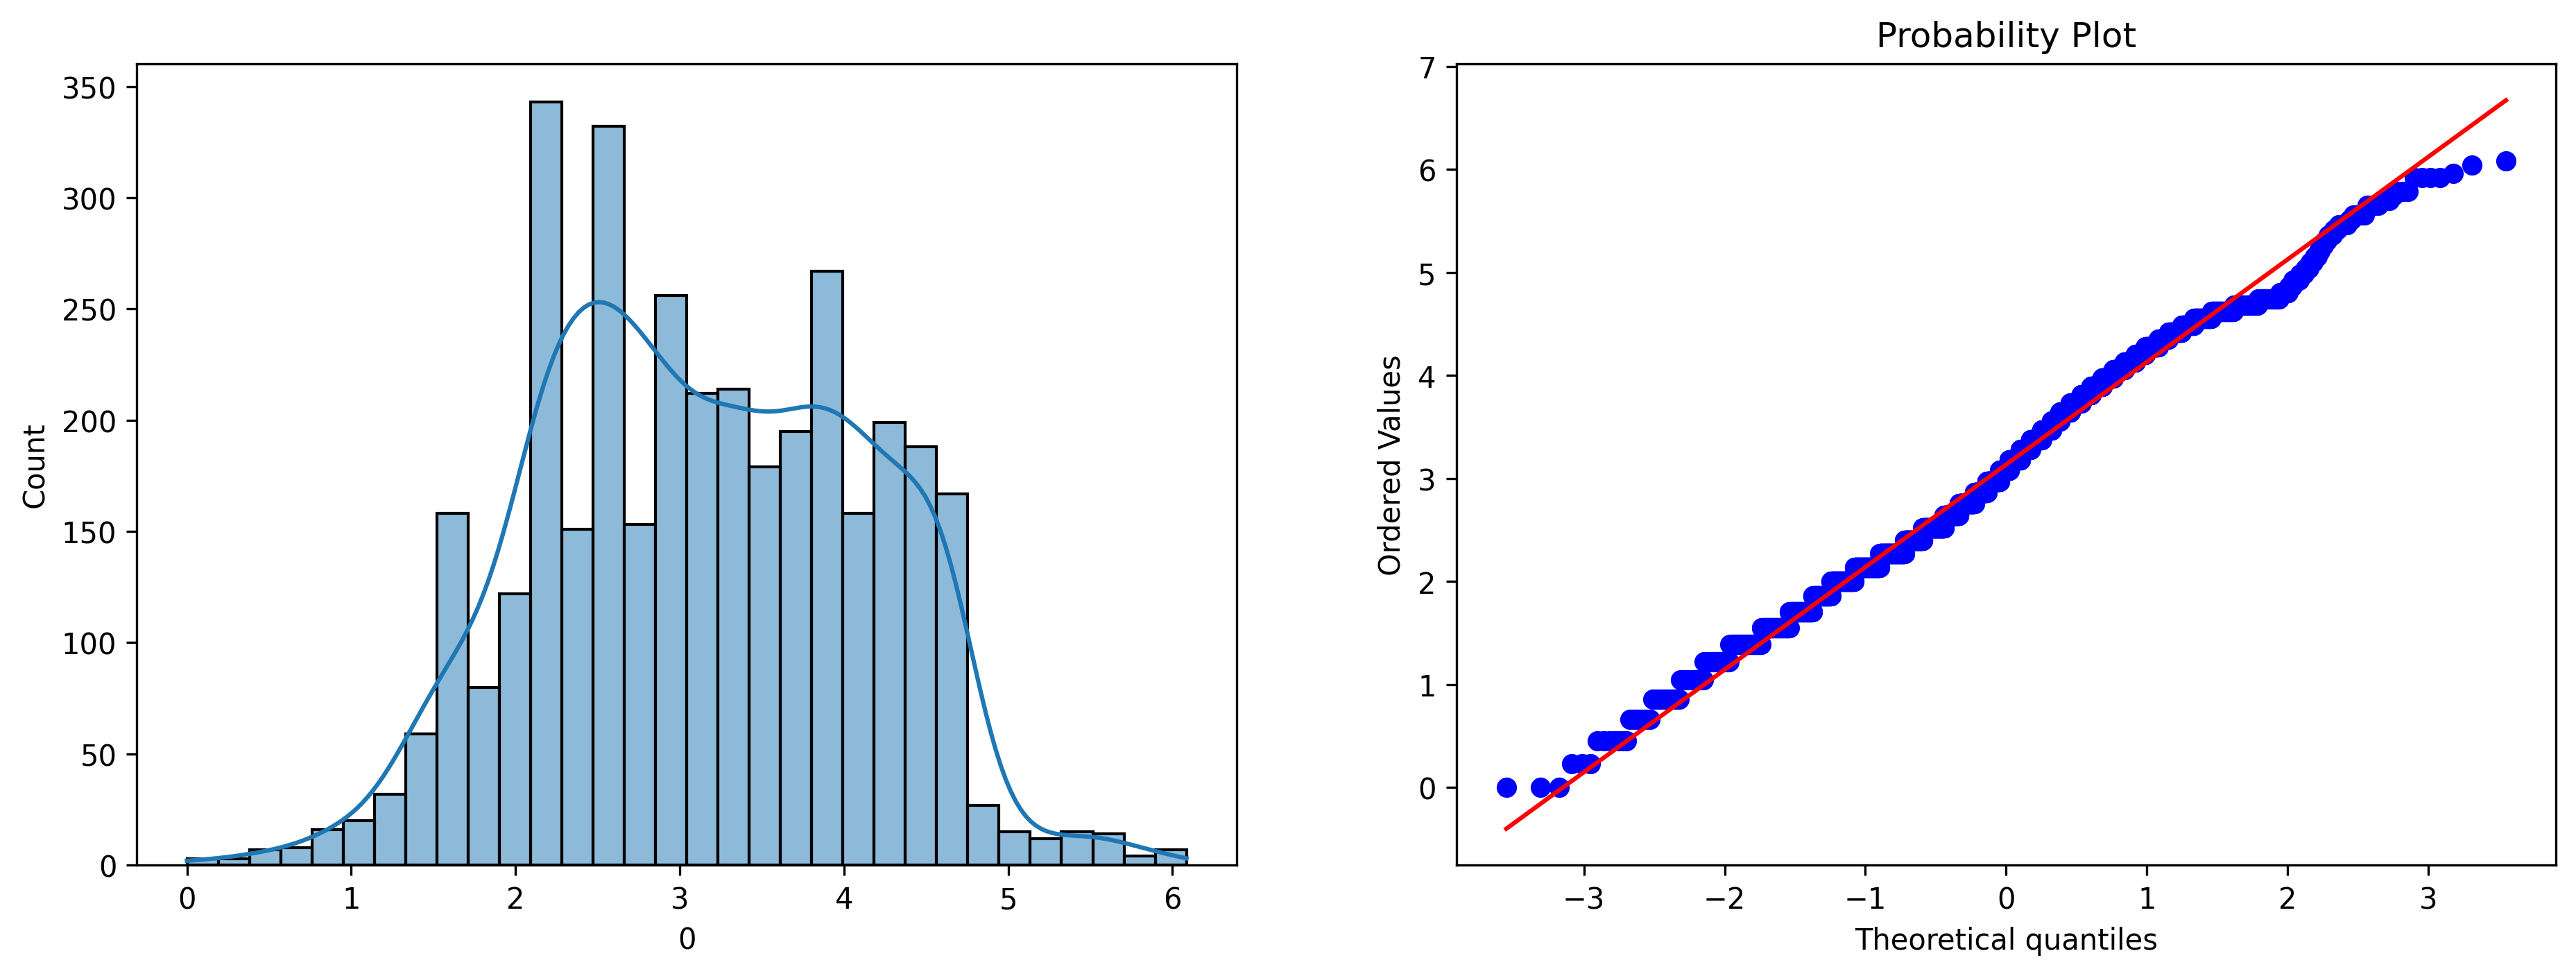

In [488]:
df_trans = pd.DataFrame(power_transform(bank_data_df[['age']], method='box-cox'))
df_trans[0] += abs(np.min(df_trans[0])) # moving to avoid negative values ?
Gaussian_distribution_check(df_trans, 0)

In [489]:
bank_data_df['age'] = power_transform(bank_data_df[['age']], method='box-cox') 
bank_data_df['age'] += abs(np.min(bank_data_df['age']))

### balance

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


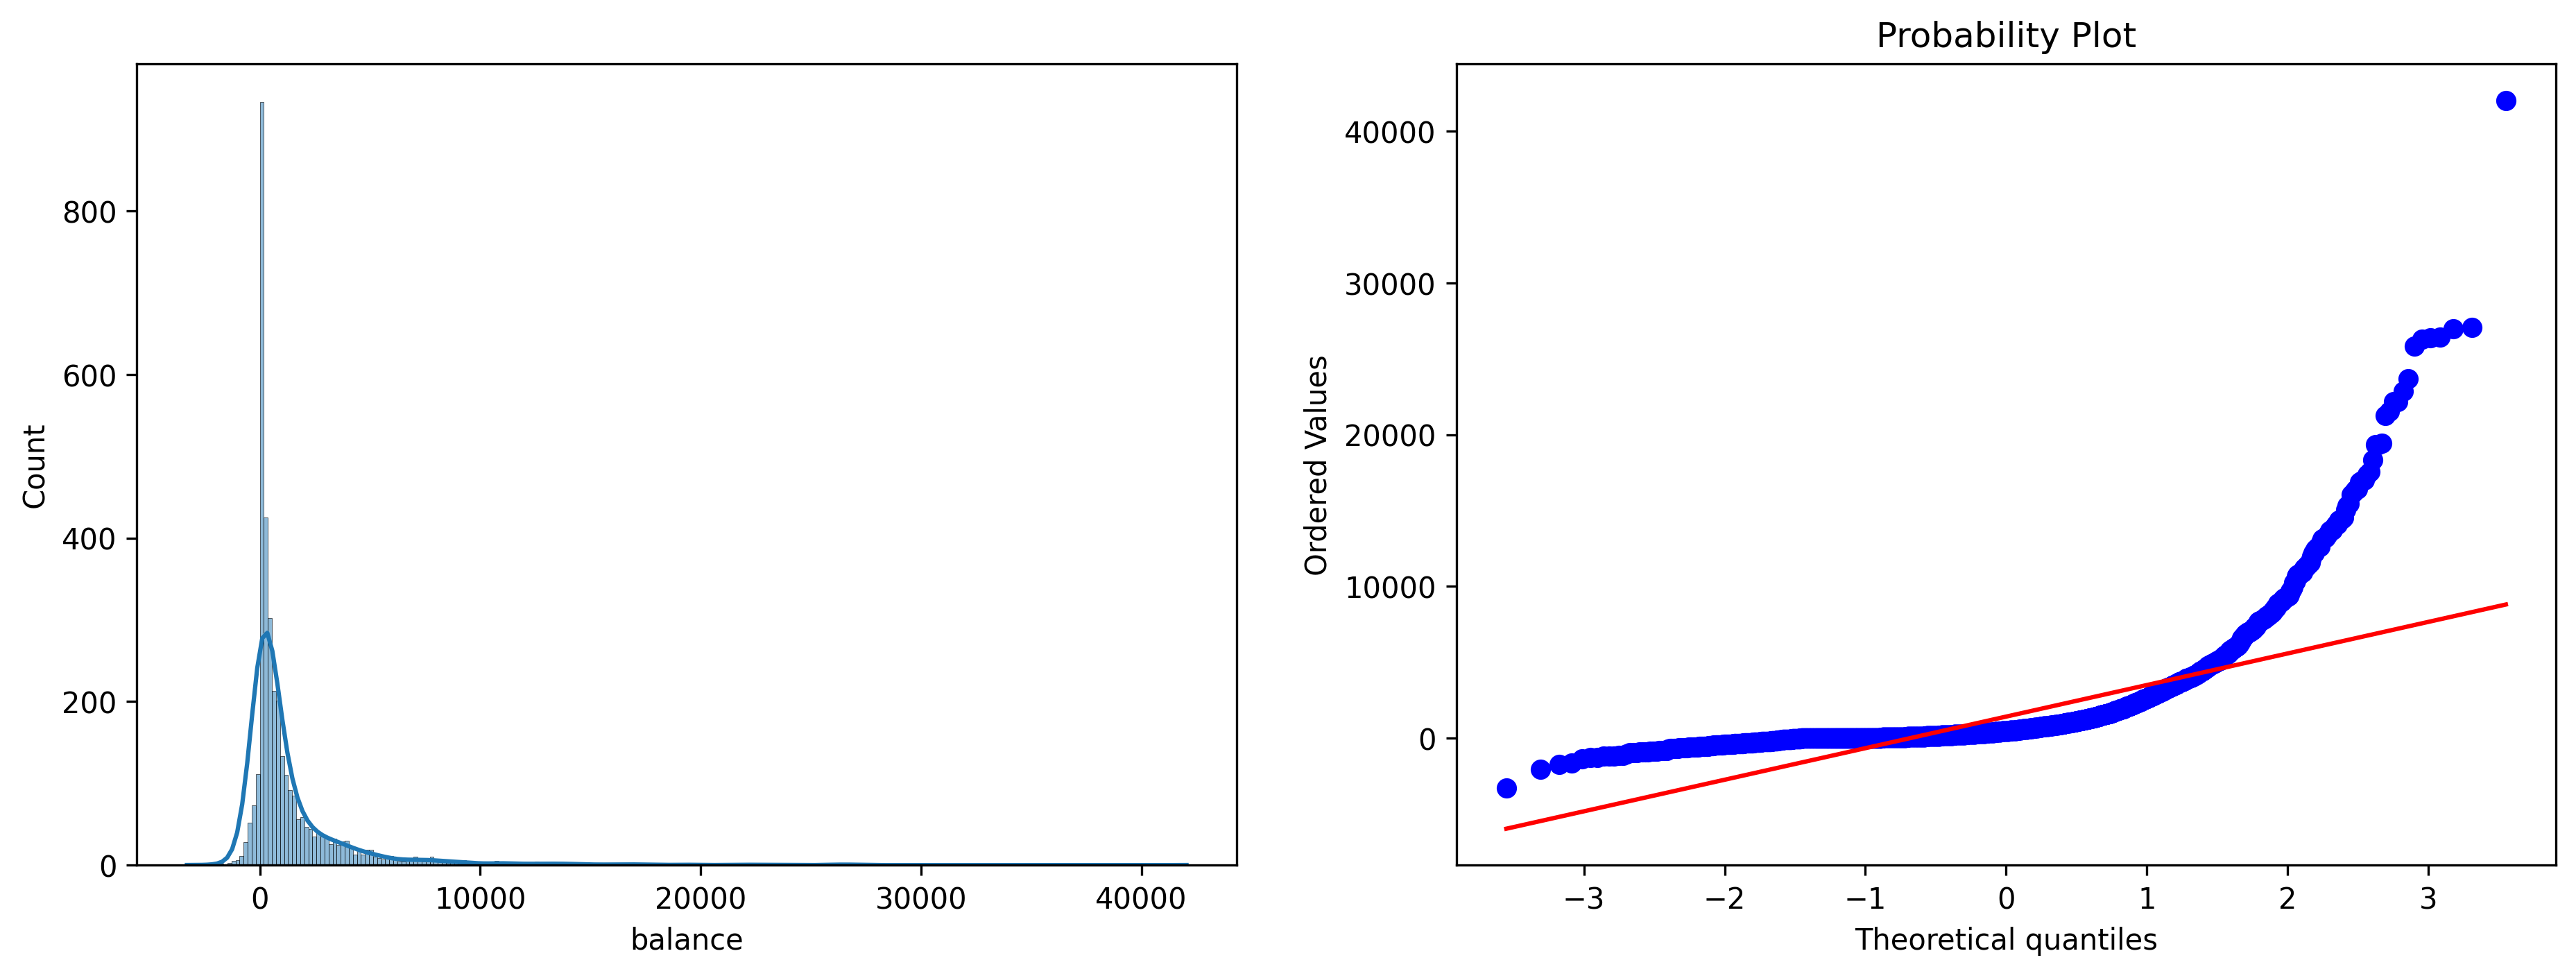

In [490]:
Gaussian_distribution_check(bank_data_df, 'balance')

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


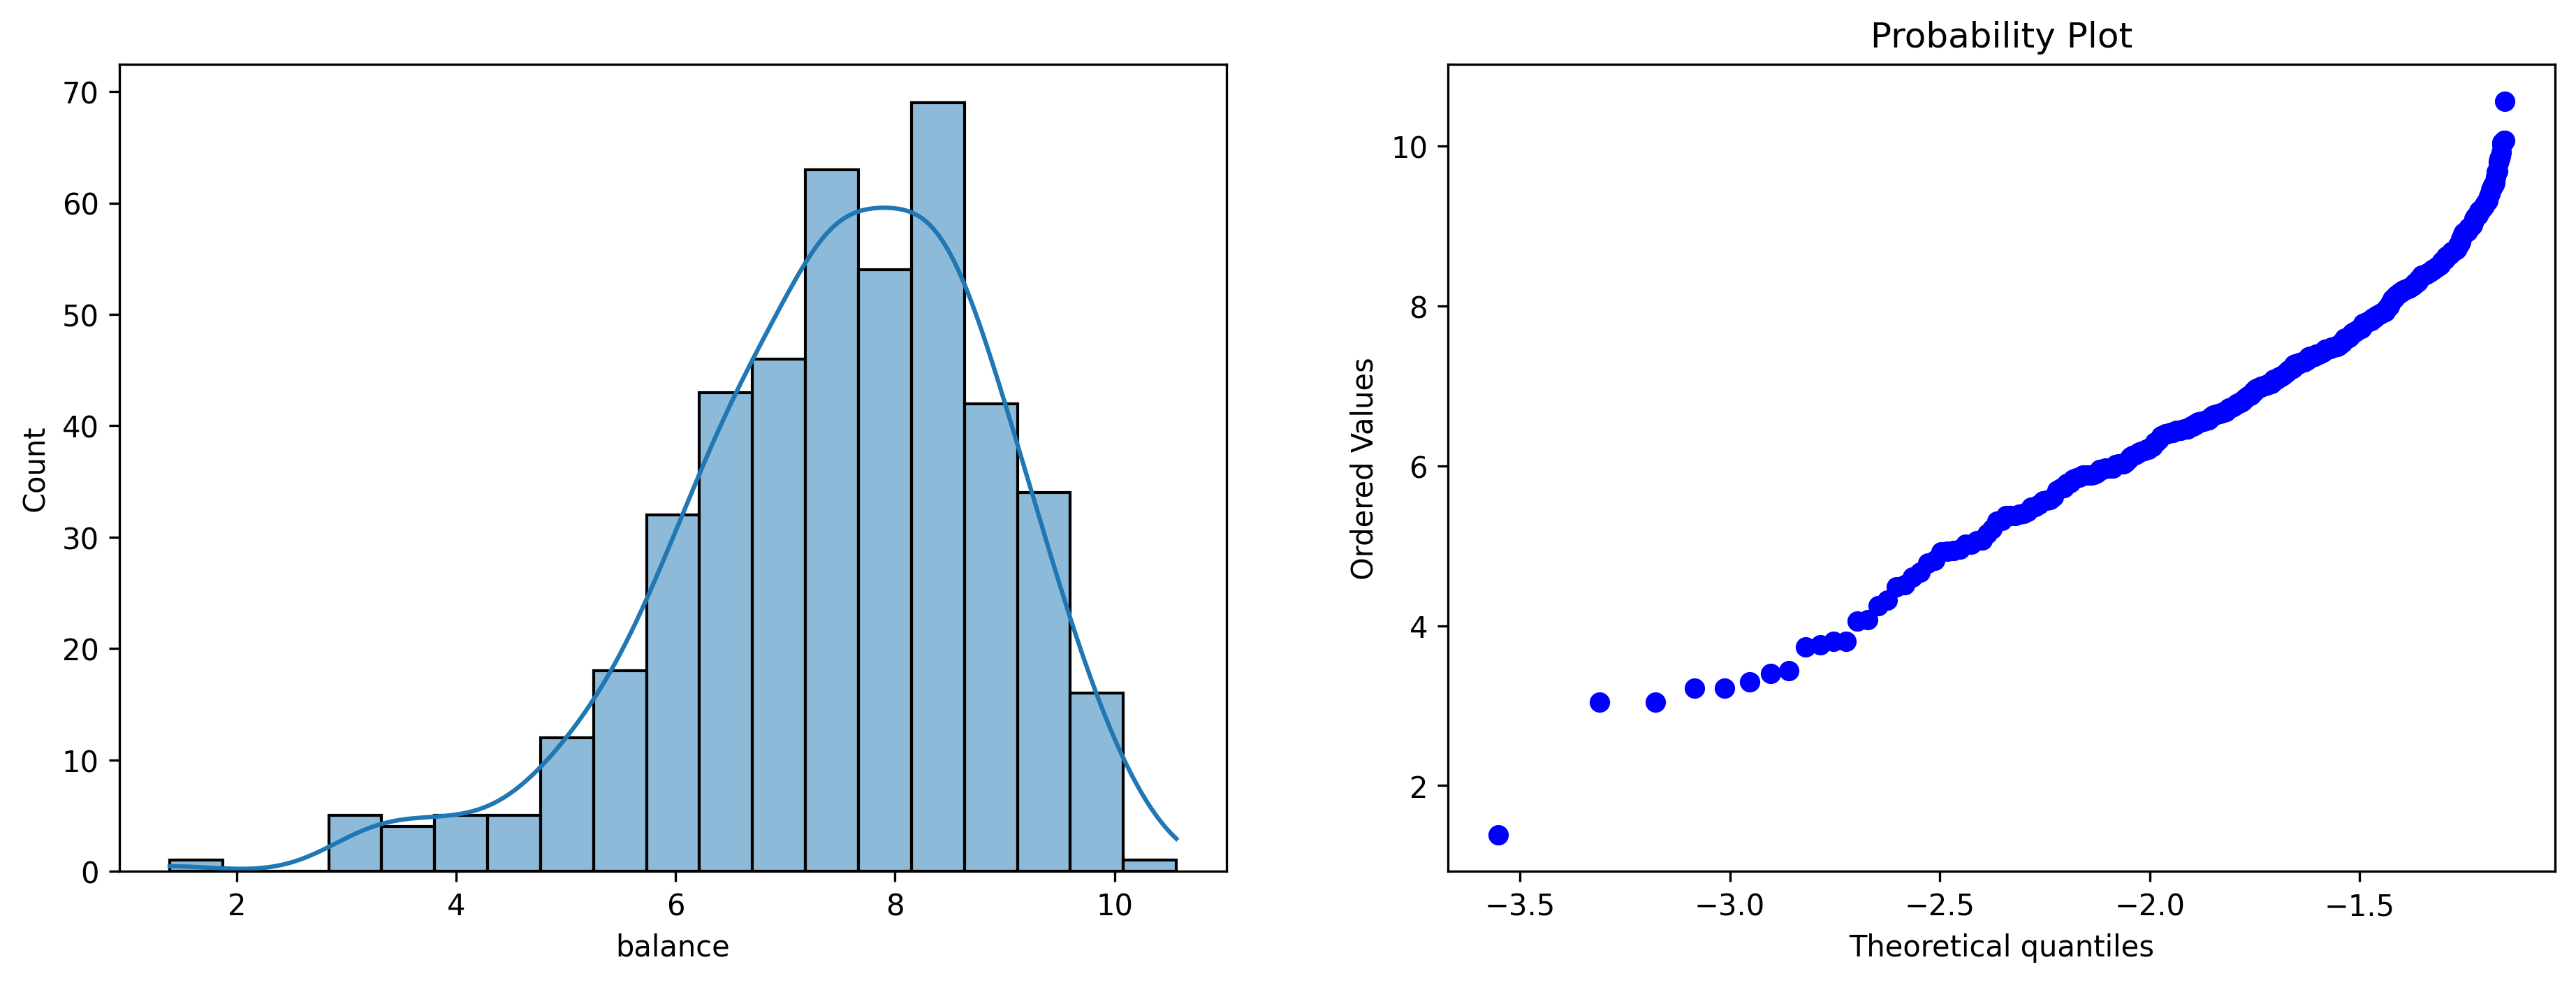

In [491]:
df_trans = pd.DataFrame(np.log1p(bank_data_df['balance'] + min(bank_data_df['balance'])))
Gaussian_distribution_check(df_trans, "balance")

In [492]:
bank_data_df['balance'] = np.log1p(bank_data_df['balance']) 
bank_data_df['balance'] += abs(np.min(bank_data_df['balance']))

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


This one looks good but it would be good to also try basic MinMaxStand in our model

## Preliminary models

In [493]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    bank_data_df.drop(columns=target_value),
    bank_data_df[target_value],
    test_size=0.2,
    stratify=bank_data_df[target_value],
    random_state=42,
)

In [494]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [495]:
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train,y_train)
# y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_hat)} \nf1_score: {f1_score(y_test, y_hat)} \nprecision_score: {precision_score(y_test, y_hat)}")

accuracy: 0.8853591160220995 
f1_score: 0.0 
precision_score: 0.0


/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Logistic regression

In [496]:
X_train.isna().mean() #na in balance

age                  0.000000
marital              0.000000
education            0.000000
default              0.000000
balance              0.080221
housing              0.000000
loan                 0.000000
duration             0.000000
campaign             0.000000
pdays                0.000000
previous             0.000000
poutcome             0.000000
day_of_the_year      0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.000000
dtype: float64

In [497]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty=None)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_hat)} \nf1_score: {f1_score(y_test, y_hat)} \nprecision_score: {precision_score(y_test, y_hat)}")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

WTF maybe there is some data leakaage 

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_hat)} \nf1_score: {f1_score(y_test, y_hat)} \nprecision_score: {precision_score(y_test, y_hat)}")

accuracy: 1.0 
f1_score: 1.0 
precision_score: 1.0


Get score function:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def printStatistics(y_test,y_hat):
    print("Accuracy:", accuracy_score(y_test,y_hat))
    print("Precision:", precision_score(y_test,y_hat))
    print("Recall:", recall_score(y_test,y_hat))
    print("F1:", f1_score(y_test,y_hat))

In [ ]:
printStatistics(y_hat,y_test)